In [1]:
# Load EDA Pkgs
import pandas as pd
import numpy as np
# Load Data Viz Pkgs
import matplotlib.pyplot as plt
import seaborn as sns
# ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,hamming_loss,classification_report

### Split Dataset into Train and Text
from sklearn.model_selection import train_test_split
# Feature engineering
from sklearn.feature_extraction.text import TfidfVectorizer
# Multi Label Pkgs
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN

In [2]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from keras_preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

In [3]:
df = pd.read_csv("AMAZON sarcasm.csv", encoding = 'unicode_escape')

In [383]:
df.head(-1)

,title,reviews,rating,sarcastic,positive,negative,neutral,admiration,angry
0,Love It!,"We loved the Echo Dot, but the Show is exponen...",5,0,1,0,0,0,0
1,Crashed after update,My first tablet was a Kindle. I was curious ab...,1,0,0,1,0,0,1
2,Very versatile,"I love this tablet/kindle. I can access email,...",5,0,1,0,0,1,0
3,Worst batteries ever,Worst batteries ever. After m Duracell's in my...,1,0,0,1,0,0,1
4,Great product,Best Buy associate explained product very well...,5,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
4858,Amazon Fire HD 8 pad,We bought this to replace a Kindle Fire pad an...,4,0,0,0,1,0,0
4859,Kindle FIRE,Purchased this for my grandson. It works great...,4,0,0,0,1,0,0
4860,Perfect for the kitchen!,I bought the white version and have it in the ...,4,0,0,0,1,0,0
4861,One Star,Terrible battery life!!!!,1,0,0,1,0,0,1


In [376]:
columns = ['sarcastic', 'happy', 'sad','neutral', 'admiration', 'angry']

In [4]:
df.dtypes

title         object
reviews       object
rating         int64
sarcastic      int64
positive       int64
negative       int64
neutral        int64
admiration     int64
angry          int64
dtype: object

In [373]:
for cl in df.columns:
    if(cl not in columns):
        continue
#     print(df[cl].value_counts())
val = [476,2420,1211,1240,926,759]

In [428]:
color = ['salmon','orchid','thistle','white','cyan','teal']

([<matplotlib.patches.Wedge at 0x1cf0cbf0888>,
 [Text(2.1504422764144793, 0.4643253340162627, 'sarcastic'),
  Text(0.14143489981384694, 2.1954489675496096, 'happy'),
  Text(-2.1998153595082814, 0.02850235203365633, 'sad'),
  Text(-1.0329532299747073, -1.942423132246118, 'neutral'),
  Text(1.0138121445067954, -1.9524817375971877, 'admiration'),
  Text(2.0747283025203767, -0.7317803432184536, 'angry')],
 [Text(1.1729685144078976, 0.25326836400887054, '6.77%'),
  Text(0.07714630898937104, 1.1975176186634233, '34.41%'),
  Text(-1.199899287004517, 0.01554673747290345, '17.22%'),
  Text(-0.5634290345316585, -1.0595035266797006, '17.63%'),
  Text(0.552988442458252, -1.064990038689375, '13.17%'),
  Text(1.1316699831929324, -0.39915291448279283, '10.79%')])

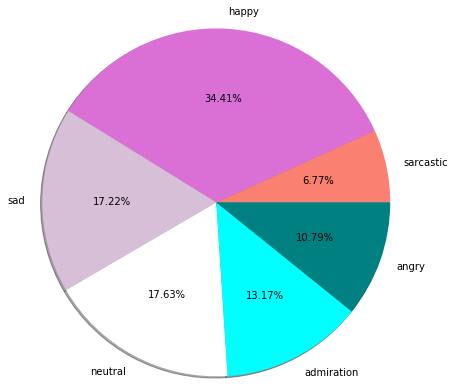

In [429]:
plt.pie(x=val,labels = columns,radius = 2,autopct= "%0.2f%%",shadow = True, colors=color)
# plt.save_fig("Dataset.png")

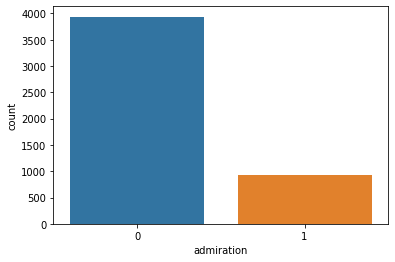

In [382]:
sns.countplot(df['admiration'])

In [177]:
df = df.sample(4863)

In [4]:
def tokenize(review):
    ret_str = ''
    review = review.split()
    for r in review:
        if lemmetiz(r) not in stopwords:
            ret_str +=lemmetiz(r)
            ret_str +=' '
    return ret_str

In [5]:
import string
import regex as re
def clean_text(text):
    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    text = pattern.sub('', text)
    text = text.lower()
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)        
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text) 
    text = re.sub(r"\'ll", " will", text)  
    text = re.sub(r"\'ve", " have", text)  
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"doesn't", "does not", text)
    text = re.sub(r"did't", "did not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"have't", "have not", text)
    text = re.sub(r"[,\"\'!@#$%^*(){}?/;`~:<>+=-]", " ", text)
    text = re.sub(r"\n", "", text)
    text = re.sub(r"&", "and", text)
    return text

In [6]:
reviews = []
for review in df['reviews']:
    a = clean_text(review)
#     a = tokenize(a)
    reviews.append(a)

In [15]:
from nltk.corpus import stopwords,wordnet
from nltk.stem import WordNetLemmatizer

stopwords = set(stopwords.words('english'))
wordnet_lemmatizer = WordNetLemmatizer()

rem = ['not', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', 
       "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', 
       "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", 'don', "don't", 
       'just', 'too', 'very', 'no', 'nor', 'only', 'own', 'same', 'again', 'against', 'but',]
for s in rem:
    stopwords.remove(s)

In [14]:
def lemmetiz(word):
    lem = wordnet_lemmatizer.lemmatize(word,'v')
    return lem

In [9]:
import os

embeddings_index = {}
GLOVE_DIR = "C:/Users/Rif010/Desktop/Rian vai try/"
f = open(os.path.join(GLOVE_DIR, 'glove.42B.300d.txt'), encoding = "utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 1917494 word vectors.


In [8]:
y = df[['sarcastic', 'happy', 'sad','neutral', 'admiration', 'angry']]

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer='word', max_features = 150, ngram_range=(1,3))

Xfeatures = tfidf.fit_transform(reviews)


In [12]:
Xfeatures.shape

(4864, 50)

In [16]:
y_train

,sarcastic,happy,sad,neutral,admiration,angry
2926,0,1,0,0,0,0
88,0,0,0,1,0,0
3857,0,1,0,0,1,0
4673,0,0,0,1,0,0
2154,0,0,0,1,0,0
...,...,...,...,...,...,...
4859,0,0,0,1,0,0
3264,0,1,0,0,0,0
1653,0,1,0,0,0,0
2607,0,1,0,0,1,0


In [28]:
# Split Data 
X_train,X_test,y_train,y_test = train_test_split(Xfeatures,y,test_size=0.20,random_state=0)

In [15]:
X_train.shape

(3891, 50)

In [ ]:
#Model

In [20]:
sgd = SGDClassifier() #loss='log',penalty='l1',alpha=0.0002
lr  = LogisticRegression(solver='lbfgs') # solvers-- ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
svc = LinearSVC()#C=1.5, penalty='l2',loss='hinge', dual= True ,class_weight='balanced'
rf  = RandomForestClassifier() #n_estimators=100,criterion="entropy",max_features='sqrt',,,criterion="gini,entropy,log_loss",max_features=log2,sqrt, class_weight="balanced,balanced_subsample"
nb  = MultinomialNB()
dt  = DecisionTreeClassifier()

In [21]:
clf_list = [sgd,lr,svc,rf,nb,dt]


In [22]:
def j_score(y_test,y_pred):
    jaccard = np.minimum(y_test,y_pred).sum(axis=1)/np.maximum(y_test,y_pred).sum(axis=1)
    return jaccard.mean()
    
def print_score(y_pred,clf):
    print("Classifier: ",clf.__class__.__name__)
    print("  Jaccard Score: {:.2f}\n".format(j_score(y_test,y_pred)))

In [29]:
clf_list = [sgd,lr,svc,rf,nb,dt]
for c in clf_list:
    clf = OneVsRestClassifier(c)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print_score(y_pred,c)

Classifier:  SGDClassifier
  Jaccard Score: 0.51

Classifier:  LogisticRegression
  Jaccard Score: 0.54

Classifier:  LinearSVC
  Jaccard Score: 0.56

Classifier:  RandomForestClassifier
  Jaccard Score: 0.56

Classifier:  MultinomialNB
  Jaccard Score: 0.45

Classifier:  DecisionTreeClassifier
  Jaccard Score: 0.55



In [136]:
#for ngram - 1,3 

for c in clf_list:
    clf = OneVsRestClassifier(c)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print_score(y_pred,c)

Classifier:  SGDClassifier
  Jaccard Score: 0.65

Classifier:  LogisticRegression
  Jaccard Score: 0.52

Classifier:  LinearSVC
  Jaccard Score: 0.65

Classifier:  RandomForestClassifier
  Jaccard Score: 0.59

Classifier:  MultinomialNB
  Jaccard Score: 0.54

Classifier:  DecisionTreeClassifier
  Jaccard Score: 0.56



In [110]:
#lr-lbgfs, rf max-sqrt

for c in clf_list:
    clf = OneVsRestClassifier(c)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print_score(y_pred,c)

Classifier:  SGDClassifier
  Jaccard Score: 0.54

Classifier:  LogisticRegression
  Jaccard Score: 0.54

Classifier:  LinearSVC
  Jaccard Score: 0.67

Classifier:  RandomForestClassifier
  Jaccard Score: 0.59

Classifier:  MultinomialNB
  Jaccard Score: 0.54

Classifier:  DecisionTreeClassifier
  Jaccard Score: 0.58



In [128]:
#default+ ngram=1,2
for c in clf_list:
    clf = OneVsRestClassifier(c)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print_score(y_pred,c)

Classifier:  SGDClassifier
  Jaccard Score: 0.65

Classifier:  LogisticRegression
  Jaccard Score: 0.52

Classifier:  LinearSVC
  Jaccard Score: 0.65

Classifier:  RandomForestClassifier
  Jaccard Score: 0.58

Classifier:  MultinomialNB
  Jaccard Score: 0.54

Classifier:  DecisionTreeClassifier
  Jaccard Score: 0.57



In [271]:
 def sentiment(a):
        p = []
        y=['sarcastic', 'happy', 'sad', 'neutral', 'admiration', 'angry']
        c = 0
        for i in range(5+1):
            if a[0][i]== 1:
                p.append(y[c])
            c +=1
        return p
        

In [448]:
# s = OneVsRestClassifier(svc)
# s.fit(X_train,y_train)
# y_pred = clf.predict(X_test)
# print_score(y_pred,s)
y_pred

<973x6 sparse matrix of type '<class 'numpy.int64'>'
	with 1360 stored elements in LInked List format>

In [450]:
from sklearn.metrics import classification_report

output_label = ['sarcastic', 'happy', 'sad','neutral', 'admiration', 'angry']
i=0
output_label
# for label in output_label:
#     print(label,multilabel_confusion_matrix(y_test,y_pred)[i],)
#     print("\n")
#     i+=1


['sarcastic', 'happy', 'sad', 'neutral', 'admiration', 'angry']

In [272]:
# s = OneVsRestClassifier(svc)
r = 'The product was excellent'
print(sentiment(s.predict(tfidf.transform([r]))))

['happy', 'admiration']


In [273]:
r = 'Service was ridiculuos'
res = s.predict(tfidf.transform([r]))
print(sentiment(res))

['sad', 'angry']


In [274]:
r = 'The price of the product is a steal'
res = s.predict(tfidf.transform([r]))
print(sentiment(res))

['happy']


In [275]:
r = 'A woman needs a man like a fish needs bicycle'
res = s.predict(tfidf.transform([r]))
print(sentiment(res))

['sarcastic', 'neutral']


In [261]:
r = 'the product is not so good'
res = s.predict(tfidf.transform([r]))
print(sentiment(res))

['neutral']


In [276]:
r = 'none of batteries i opened worked fine.'
res = s.predict(tfidf.transform([r]))
print(sentiment(res))

['sad', 'angry']


In [277]:
#Fail
r = 'This was my second kindle and I did not realize that it was not paper white . What a difference..'
res = s.predict(tfidf.transform([r]))
print(sentiment(res))

['happy']


In [278]:
r = 'these have caused every fire alarm in the house to sound within days of installing these batteries.'
res = s.predict(tfidf.transform([r]))
print(sentiment(res))

['sad', 'angry']


In [282]:
#fail
r = 'i will consider buying frequently from them'
res = s.predict(tfidf.transform([r]))
print(sentiment(res))'we are in love with your negative reviews'

['sad']


In [355]:
#fail
r = 'we are in love with your negative reviews'
res = s.predict(tfidf.transform([r]))
print(sentiment(res))

['happy']


In [430]:
r = 'with a sense of humour like that,you could make a living as a garbage man anywhere in the country'
res = s.predict(tfidf.transform([r]))
print(sentiment(res))

['sarcastic']


# Binary Relevence

In [283]:

binary_rel_clf = BinaryRelevance(MultinomialNB())
binary_rel_clf.fit(X_train,y_train)

br_prediction = binary_rel_clf.predict(X_test)


In [284]:
br_prediction = br_prediction.toarray()

In [291]:
# Accuracy
print("Accuracy\t",accuracy_score(y_test,br_prediction))
print("Hamming-Loss\t",hamming_loss(y_test,br_prediction))


Accuracy	 0.4090441932168551
Hamming-Loss	 0.1408016443987667


In [292]:
#gaussian NB
from sklearn.naive_bayes import GaussianNB

gnb = BinaryRelevance(GaussianNB())
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)

In [295]:
#accuracy for gauss 
print("Accuracy\t",accuracy_score(y_test,y_pred))
print("Ham-loss\t",hamming_loss(y_test,y_pred))

Accuracy	 0.4265159301130524
Ham-loss	 0.16735183281945873


# Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
# clf = BinaryRelevance(RandomForestClassifier(n_estimators=100))
# clf.fit(X_train,y_train)
# y_pred = clf.predict(X_test)

In [298]:
print("Accuracy\t",accuracy_score(y_test,y_pred))
print("Hamm-loss\t",hamming_loss(y_test,y_pred))

Accuracy	 0.47173689619732784
Hamm-loss	 0.12966769441589585


In [437]:
from sklearn.metrics import multilabel_confusion_matrix, precision_score

# multilabel_confusion_matrix(y_test,br_prediction)



In [292]:
precision_score(y_test,br_prediction, average= None)

array([1.        , 0.72631579, 0.91743119, 0.71428571, 0.        ,
       0.8125    ])

In [293]:
print("micro: {:.2f}".format(precision_score(y_test,br_prediction, average= 'micro')))
print("macro: {:.2f}".format(precision_score(y_test,br_prediction, average= 'macro')))
print("weighted: {:.2f}".format(precision_score(y_test,br_prediction, average= 'weighted')))
print("samples: {:.2f}".format(precision_score(y_test,br_prediction, average= 'samples')))

micro: 0.76
macro: 0.70
weighted: 0.68
samples: 0.62


C:\Users\Rif010\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [294]:
from sklearn import metrics

print("micro: {:.2f}".format(metrics.average_precision_score(y_test,br_prediction, average= 'micro')))
print("macro: {:.2f}".format(metrics.average_precision_score(y_test,br_prediction, average= 'macro')))
print("weighted: {:.2f}".format(metrics.average_precision_score(y_test,br_prediction, average= 'weighted')))
print("samples: {:.2f}".format(metrics.average_precision_score(y_test,br_prediction, average= 'samples')))


micro: 0.49
macro: 0.40
weighted: 0.48
samples: 0.62


In [295]:
from sklearn.metrics import classification_report

output_label = ['sarcastic', 'positive', 'negative','neutral', 'admiration', 'angry']
print(classification_report(y_test,br_prediction,target_names=output_label))


              precision    recall  f1-score   support

   sarcastic       1.00      0.08      0.15        72
    positive       0.73      0.93      0.82       369
    negative       0.92      0.56      0.69       179
     neutral       0.71      0.05      0.10       183
  admiration       0.00      0.00      0.00       146
       angry       0.81      0.37      0.51       105

   micro avg       0.76      0.47      0.59      1054
   macro avg       0.70      0.33      0.38      1054
weighted avg       0.68      0.47      0.48      1054
 samples avg       0.62      0.50      0.53      1054



C:\Users\Rif010\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [308]:
from sklearn.model_selection import cross_validate, KFold
clf = RandomForestClassifier(n_estimators=100)
k_fold = KFold(n_splits = 10 , shuffle = False)
k_fold
scores = cross_validate(clf, X_train,y_train, cv = k_fold, scoring = ['accuracy'])

In [310]:
scores['test_accuracy']

array([0.47692308, 0.46015424, 0.46015424, 0.49357326, 0.4344473 ,
       0.47043702, 0.47300771, 0.45244216, 0.49871465, 0.4781491 ])

In [311]:
scores['test_accuracy'].mean()

0.46980027684397874

In [315]:
clf = BinaryRelevance(LinearSVC())
k_fold = KFold(n_splits = 10 , shuffle = False)
k_fold
scores = cross_validate(clf, X_train,y_train, cv = k_fold, scoring = ['accuracy'])
scores['test_accuracy']

array([0.47179487, 0.45244216, 0.46015424, 0.49357326, 0.44987147,
       0.47557841, 0.48329049, 0.48586118, 0.50128535, 0.48586118])

In [316]:
scores['test_accuracy'].mean()

0.4759712609584075

# Classifier Chain to preserve label correlation

In [320]:
def build_model(model,estimator,xtrain,ytrain,xtest,ytest):
    
    clf = estimator(model)
    clf.fit(xtrain,ytrain)
    clf_predictions = clf.predict(xtest)
    
    acc = accuracy_score(ytest,clf_predictions)
    ham = hamming_loss(ytest,clf_predictions)
    
    result = {"Accuracy: ":acc,"Hamming-loss ":ham}
    return result

clf_chain_model = build_model(RandomForestClassifier(),ClassifierChain,X_train,y_train,X_test,y_test)
clf_chain_model

{'Accuracy: ': 0.5416238437821171, 'Hamming-loss ': 0.13275094210346008}

In [322]:
gnb = GaussianNB()
clf_chain_model = build_model(gnb,ClassifierChain,X_train,y_train,X_test,y_test)
clf_chain_model

{'accuracy:': 0.2356164383561644, 'hamming_score': 0.24771689497716895}

In [391]:
clf = ClassifierChain(MultinomialNB())
k_fold = KFold(n_splits = 10, shuffle = False)#, random_state = 24)
k_fold
scores = cross_validate(clf, X_train,y_train, cv = k_fold, scoring = ['accuracy'],error_score='raise')
scores

{'fit_time': array([6.89681029, 6.42617702, 6.51280999, 6.32791185, 6.04387116,
        5.33637643, 5.19335794, 5.52480268, 5.19553018, 5.25234222]),
 'score_time': array([1.78857589, 1.03703928, 0.85052037, 0.70438457, 0.65816021,
        0.60330415, 0.83618212, 0.61293483, 0.62856793, 1.18574905]),
 'test_accuracy': array([0.38647343, 0.41545894, 0.43478261, 0.4188862 , 0.41646489,
        0.41404358, 0.42857143, 0.40435835, 0.40920097, 0.45520581])}

In [327]:
clf = ClassifierChain(svc)
k_fold = KFold(n_splits = 8 , shuffle = False)
k_fold
scores = cross_validate(clf, X_train,y_train, cv = k_fold, scoring = ['accuracy'],error_score='raise')
scores['test_accuracy']

array([0.5338809 , 0.48665298, 0.51334702, 0.53497942, 0.51851852,
       0.56378601, 0.55144033, 0.5308642 ])

In [328]:
scores['test_accuracy'].mean()

0.5291836726071268

In [325]:
svc = LinearSVC()
clf_chain_model = build_model(svc,ClassifierChain,X_train,y_train,X_test,y_test)
clf_chain_model

{'Accuracy: ': 0.5837615621788284, 'Hamming-loss ': 0.12076053442959918}


# Label PowerSet

In [329]:
#Multi-Nomial NB
clf_labelP_model = build_model(MultinomialNB(),LabelPowerset,X_train,y_train,X_test,y_test)
clf_labelP_model

{'Accuracy: ': 0.49229188078108943, 'Hamming-loss ': 0.1510791366906475}

In [330]:
#Random Forest
rf = RandomForestClassifier(n_estimators=150)
clf_labelP_model = build_model(rf,LabelPowerset,X_train,y_train,X_test,y_test)
clf_labelP_model

{'Accuracy: ': 0.5549845837615622, 'Hamming-loss ': 0.1344638574854402}

In [332]:
#Linear SVC
clf_labelP_model = build_model(svc,LabelPowerset,X_train,y_train,X_test,y_test)
clf_labelP_model

{'Accuracy: ': 0.579650565262076, 'Hamming-loss ': 0.12675573826652964}

In [339]:
clf = LabelPowerset(svc)
clf.fit(X_train,y_train)

LabelPowerset(classifier=LinearSVC(), require_dense=[True, True])

In [352]:
#Test
ex1 = ' if you are looking to purchase a scary toy that makes vacuum cleaner sucking sounds and plays the most annoying   arcade like   music  then this is for you. '
ex1 = 'we are in love with your negative reviews'
ex1 = clean_text(ex1)
vec_example = tfidf.transform([ex1])
sentiment(clf.predict(vec_example).toarray())

['happy']

In [357]:
import joblib

In [358]:


# Save Model
LabelPowSVC_file = open("LabelPowSVC_file.pkl","wb")
joblib.dump(clf,LabelPowSVC_file)
LabelPowSVC_file.close()


# Save Vectorizer
tfidf_vectorizer_file = open("tfidf_vectorizer_review_file.pkl","wb")
joblib.dump(tfidf,tfidf_vectorizer_file)
tfidf_vectorizer_file.close()


#### Adapted Algorithm
from skmultilearn.adapt import MLkNN

# Adaption

In [345]:
#### Adapted Algorithm
from skmultilearn.adapt import MLkNN

In [378]:
classifier = MLkNN(k=100)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

AttributeError: 'DataFrame' object has no attribute 'getformat'

# OnevsRest

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier


In [371]:
logreg = Pipeline([('clf',OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),])
logreg.fit(X_train,y_train)

Pipeline(steps=[('clf',
                 OneVsRestClassifier(estimator=LogisticRegression(),
                                     n_jobs=-1))])

In [372]:
ypred = logreg.predict(X_test)

In [373]:
accuracy_score(y_test,y_pred)

0.47534246575342465

In [374]:
hamming_loss(y_test,y_pred)

0.13333333333333333

In [375]:
logreg = Pipeline([('rf',OneVsRestClassifier(LogisticRegression(solver='lbfgs'), n_jobs=-1)),])
logreg.fit(X_train,y_train)

ypred = logreg.predict(X_test)

In [376]:
accuracy_score(y_test,y_pred)

0.47534246575342465

In [377]:
hamming_loss(y_test,y_pred)

0.13333333333333333